In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
from datetime import datetime

# Input parameters for pit inflow  
Imported from csv file - <i>'Straight_Wall_Inflow_Params.csv'</i>

NOTE: This is for a static intial set saturated height at the wall. variable <b>b</b>

In [14]:
df = pd.read_csv('Straight_Wall_Inflow_Params.csv', header=0, index_col = 'Parameter')
#calcs effective pit radius
width = df.loc['wall width','value']

#input parameters for pit inflow 
W  = df.loc['distributed recharge','value']
kh = df.loc['horizontal K','value']
Base = df.loc['Base','value']
sGWL = df.loc['static GWL','value']
h0 = sGWL - Base
b = df.loc['Saturated height at wall','value']

print(df)
#print values imported
'''print('distributed recharge:',W,
'horizontal K: ',kh,
'Bottom of cur or wall:',Base,
'Static water level: ',sGWL,
'inital saturated thickness of aquifer: ',h0,
'height of water at wall face: ',b)  '''

                         symbol     value units                  comment
Parameter                                                               
wall width                    a  200.0000     m                      NaN
distributed recharge          W    0.0002   m/d                      NaN
horizontal K                 kh    0.1000   m/d                  minimum
Base                       Base   50.0000  mAHD                      NaN
static GWL                 sGWL   70.0000  mAHD                      NaN
Saturated height at wall      b    1.0000     m  height of water at wall


"print('distributed recharge:',W,\n'horizontal K: ',kh,\n'Bottom of cur or wall:',Base,\n'Static water level: ',sGWL,\n'inital saturated thickness of aquifer: ',h0,\n'height of water at wall face: ',b)  "

In [29]:
#create a dictionary of lists with headers roi and pitinflow
results = { 
            'DistOfInfluence_m':[],
            'Wall_inflow_m3/d':[],
            'drawdown_m':[],
            'Saturated_thick_at_DistUpgradient_m':[],
            'DistUpgradient_m':[]
            }

## Calculation
NOTE: This is for a steady state inflowusing a set saturated height at the wall.  
Variable <b>b</b>

In [41]:
#h = h0 in this first equation to get distance of influence for aquifer thickness
DistOfInfluence = math.sqrt(h0 **2 * kh - b**2 * kh)/math.sqrt(W)

#DistUpgradient = various distance upgradient from the face to calculate saturated thckness and drawdown at
DistUpgradient = np.linspace(1,DistOfInfluence,10)

for dist in DistUpgradient:
    h = math.sqrt(b**2 +W/kh*(2*DistOfInfluence * dist - dist**2))
    Q = W * DistOfInfluence * width
    Drawdown = h0 - h
    
    print('DistUpgradient is: ',round(dist,1),
    ', Saturated height at distance upgradient: ',round(h,1),'m',
    ',Drawdown is: ',round(Drawdown,1),'m',
    ', Discharge is: ',round(Q,1),'m3/day')

    # append data into list in dictionary
    results['DistOfInfluence_m'].append(round(DistOfInfluence,1))
    results['Wall_inflow_m3/d'].append(round(Q,1))
    results['drawdown_m'].append(round(Drawdown,1))
    results['Saturated_thick_at_DistUpgradient_m'].append(round(h,1))
    results['DistUpgradient_m'].append(round(dist,1))

DistUpgradient is:  1.0 , Saturated height at distance upgradient:  1.7 m ,Drawdown is:  18.3 m , Discharge is:  17.9 m3/day
DistUpgradient is:  50.5 , Saturated height at distance upgradient:  9.3 m ,Drawdown is:  10.7 m , Discharge is:  17.9 m3/day
DistUpgradient is:  100.0 , Saturated height at distance upgradient:  12.6 m ,Drawdown is:  7.4 m , Discharge is:  17.9 m3/day
DistUpgradient is:  149.6 , Saturated height at distance upgradient:  14.9 m ,Drawdown is:  5.1 m , Discharge is:  17.9 m3/day
DistUpgradient is:  199.1 , Saturated height at distance upgradient:  16.7 m ,Drawdown is:  3.3 m , Discharge is:  17.9 m3/day
DistUpgradient is:  248.6 , Saturated height at distance upgradient:  17.9 m ,Drawdown is:  2.1 m , Discharge is:  17.9 m3/day
DistUpgradient is:  298.1 , Saturated height at distance upgradient:  18.9 m ,Drawdown is:  1.1 m , Discharge is:  17.9 m3/day
DistUpgradient is:  347.6 , Saturated height at distance upgradient:  19.5 m ,Drawdown is:  0.5 m , Discharge is: 

## Save to file

In [42]:
#name output file
K = str(kh)
distrutedRecharge =str(W)

dt = str(datetime.now())
dt = dt.split('.')[0].replace(':','-')
output = 'K_'+ K + '_Recharge_' + distrutedRecharge+ '_wall_inflow_output_'+ dt +'.csv'

#put dictionary into dataframe and then export dataframe to .csv file
WallInflow = pd.DataFrame.from_dict(results,'columns')
WallInflow.sort_values(by='DistUpgradient_m',ascending=True,inplace=True)

## Plot chart of drawdown upgradient from wall

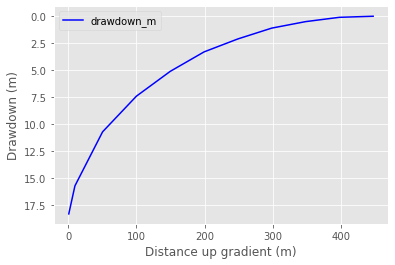

In [43]:
ax = WallInflow.plot(x='DistUpgradient_m', y='drawdown_m',color='blue')
ax.set_xlabel('Distance up gradient (m)')
ax.set_ylabel('Drawdown (m)')
ax.invert_yaxis()

plt.show()